# Week 4 Assignment Census Data
## Transportation profile Los Angeles
### Commuting times by neighborhoods 


In [ ]:
### This assignments looks to 

### Jose Portales

In [ ]:
# First, provide workstation. import pandas to provide library for data exploration
# provide entrance for downloaded data

In [5]:
import pandas as pd
import geopandas as gpd
neighborhoods=gpd.read_file('incneigh.geojson')

In [4]:
#First we want to upload the csv files and filter the needed data
# The first csv is from the neighborhoods in LA County. The only file founded for this specifial spatial unit was one from the  Incarceration Impact by neighborhood. It was then renamed and uploaded

In [6]:
#Check the size of the data
neighborhoods.shape

(244, 20)

In [7]:
#Check a small sample of the columns and rows
neighborhoods.head()

,OBJECTID,Neighborhood,LAPD_Cost,LAPD_Days_in_Jail,LAPD_Arrests,LASD_Cost,LASD_Days_in_Jail,LASD_Arrests,F2010_Population,Combo_Cost,Combo_Cost_PerPop,Combo_Days,Combo_Days_PerPop,Combo_Arrests,Combo_Arrests_PerPop,spa,sup_dist,SHAPE_Length,SHAPE_Area,geometry
0,1,Acton,25282,110,51,1103120,7367,396,6128,1128402,184.138708,7477,1.220137,447,0.072944,SPA 1 - Antelope Valley,District 5,0.554615,0.010002,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,Agoura Hills,83892,365,216,587038,3288,470,17147,670930,39.128127,3653,0.213040,686,0.040007,SPA 2 - San Fernando,District 3,0.255669,0.002063,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,Agua Dulce,10573,46,23,377880,2513,140,21499,388453,18.068422,2559,0.119029,163,0.007582,SPA 1 - Antelope Valley,District 5,0.439983,0.008000,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,Alhambra,301550,1312,647,2444920,16637,751,3535,2746470,776.936351,17949,5.077511,1398,0.395474,SPA 3 - San Gabriel,District 1,0.210733,0.001929,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,Alondra Park,55621,242,112,667093,4244,326,83089,722714,8.698071,4486,0.053990,438,0.005271,SPA 8 - South Bay,District 2,0.078123,0.000288,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


<Axes: >

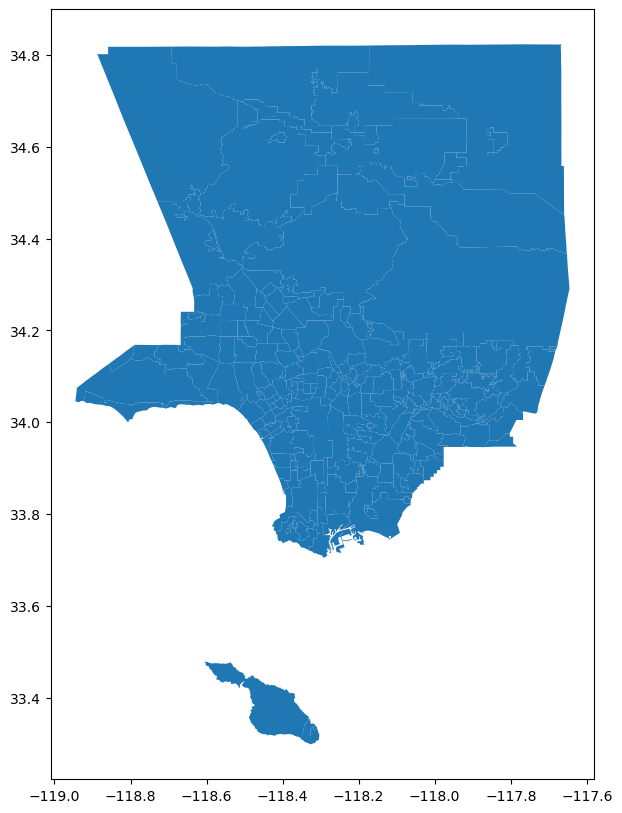

In [8]:
#Plot the file to undestrand the size of the "geometry" of the geojsn file
neighborhoods.plot(figsize=(12,10))

In [9]:
#shorten the data and generate a new dataframe with the deisred information.We only need specific variables and info

columns_to_keep = ['OBJECTID',
                   'spa',
                   'Neighborhood',
                   'sup_dist',
                  'geometry']

In [10]:
neighborhoods2 = neighborhoods[columns_to_keep]

In [11]:
#Check the size of the new, trimmed variable
neighborhoods2.shape

(244, 5)

In [12]:
#Create another variable trimming another information, this time 2 rows that contain information about the unwanted neighborhoods(islands below)

neighborhoods3 = neighborhoods2.drop([11, 207])

In [13]:
#Check the new variable
neighborhoods3.shape

(242, 5)

<Axes: >

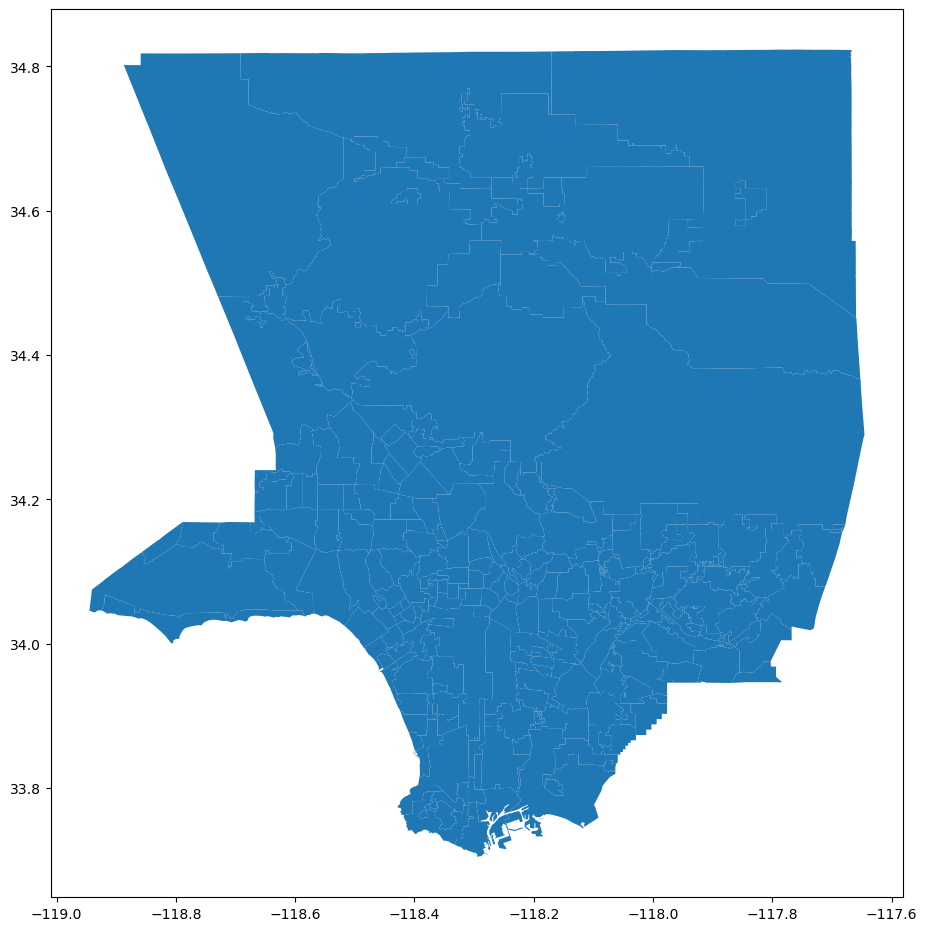

In [14]:
#Plot the new varaible with the unwanted land. Now LA Cojnty has been mapped
neighborhoods3.plot(figsize=(11,12))

In [15]:
#Import csv file with the % of commute time above 1 hour by neighborhood in LA County
commute=pd.read_csv('CTLC3.csv', delimiter=';')
commute.head()

,name,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [16]:
#For the upcoming merge, we want to change the name of the variable "neighborhood" to allow the merge to work
commute.rename(columns={'name': 'Neighborhood'}, inplace=True)
commute.head()

,Neighborhood,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [19]:
#Check bot databases have the same name of columnn
neighborhoods3.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


In [20]:
#merge based on common element

merged_df = neighborhoods3.merge(commute,on='Neighborhood')



In [21]:
#Check the merge was succesfull
merged_df.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,...",2021,"1448,51",42.38
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,...",2021,"8032,5",15.27
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,...",2021,"2073,33",21.80
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,...",2021,"40794,02",11.12
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,...",2021,"3869,87",16.85


In [22]:
#Check info
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   225 non-null    int64   
 1   spa                        225 non-null    object  
 2   Neighborhood               225 non-null    object  
 3   sup_dist                   225 non-null    object  
 4   geometry                   225 non-null    geometry
 5   year                       225 non-null    int64   
 6   denom_tot_workers          224 non-null    object  
 7   Commute Time Above 1 Hour  224 non-null    float64 
dtypes: float64(1), geometry(1), int64(2), object(4)
memory usage: 14.2+ KB


In [23]:
merged_df.shape


(225, 8)

<Axes: >

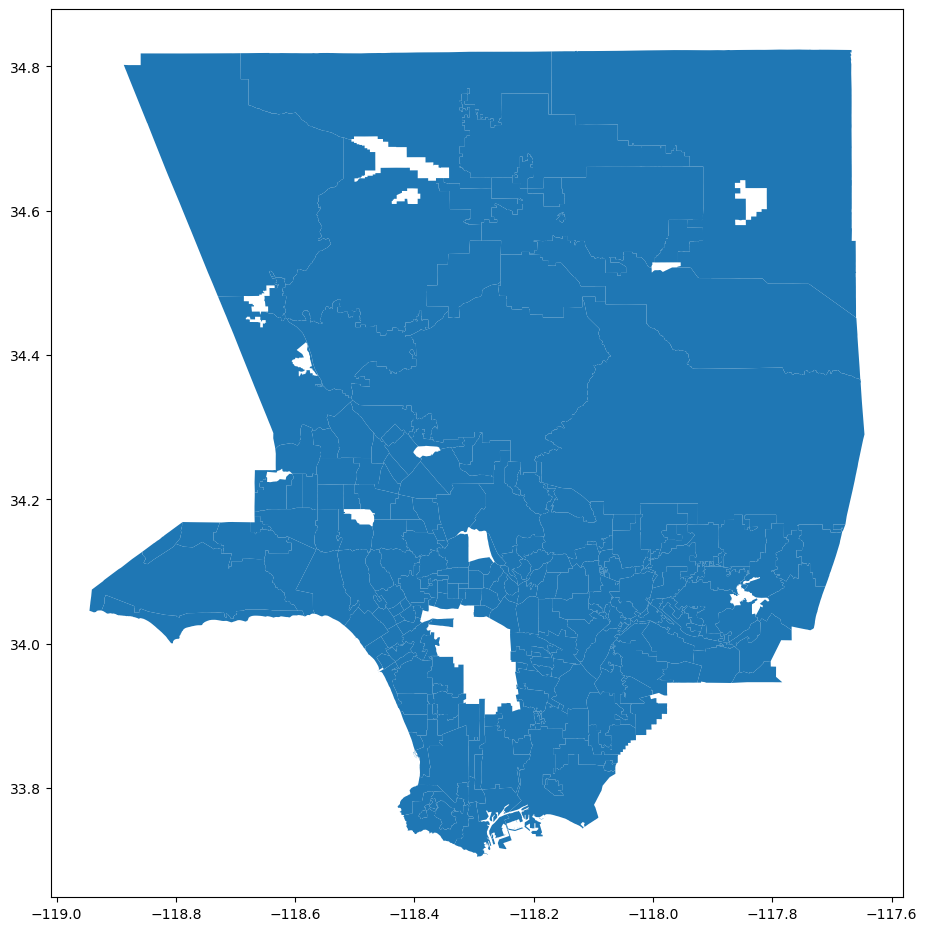

In [24]:
#Plot the merged database. Blank gaps in the map tells us the mssing neighborhoods in the previous databases
merged_df.plot(figsize=(11,12))

<Axes: >

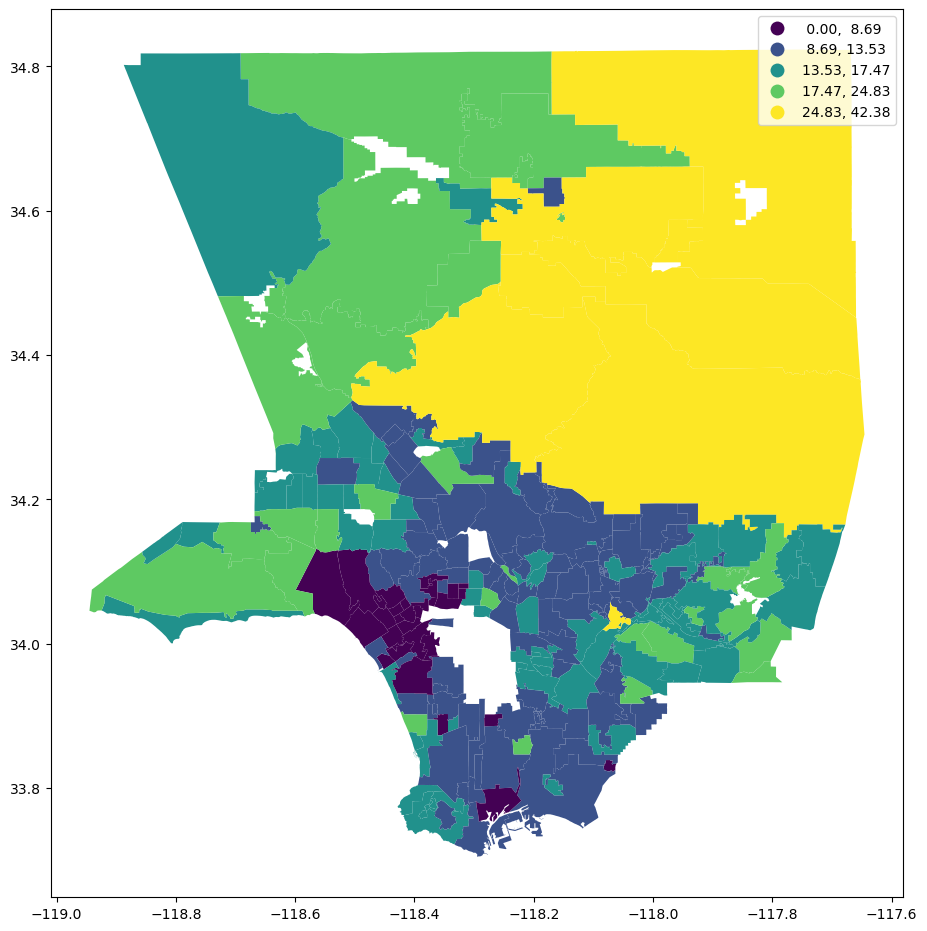

In [25]:
#First plot, provide information on the percentages of workers that commute above 1 hour for work.
merged_df.plot(figsize=(11,12),
               column='Commute Time Above 1 Hour',
               legend=True,
               scheme='NaturalBreaks')


<Axes: >

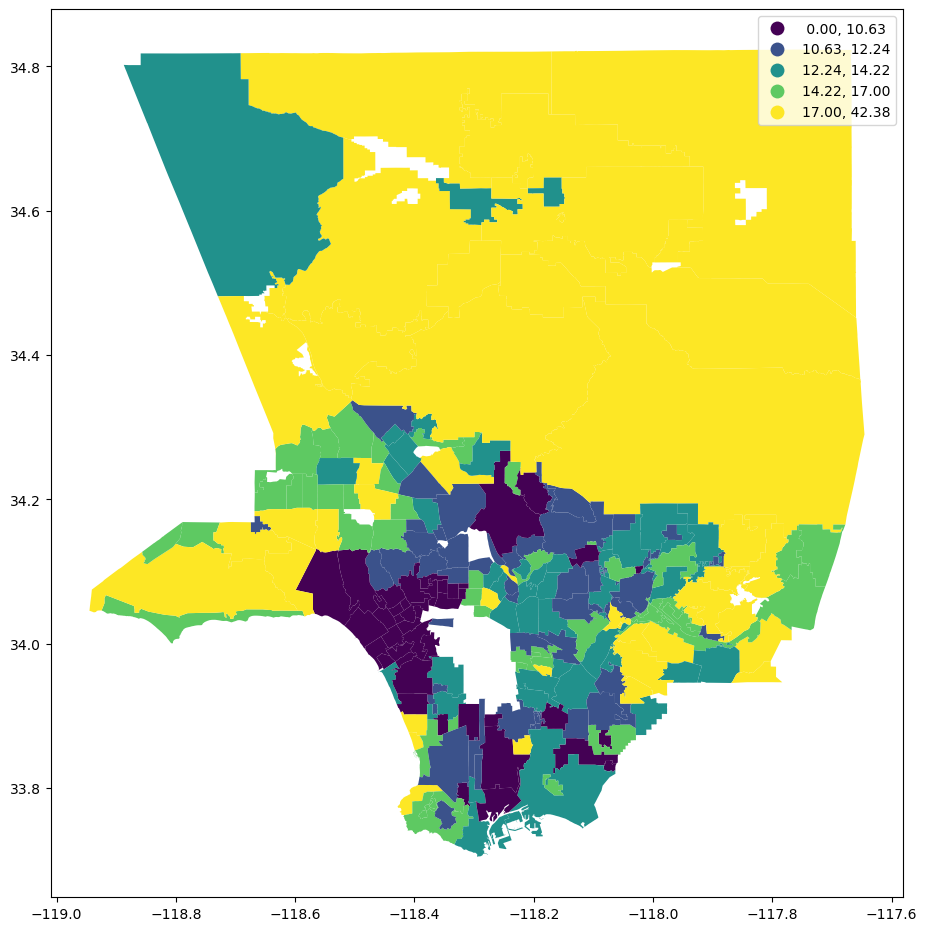

In [27]:
#Another break, but with quantiles, reinterpretating the data
merged_df.plot(figsize=(11,12),
               column='Commute Time Above 1 Hour',
               legend=True,
               scheme='quantiles')

In [24]:
#As 24.4 was the highest natural brake, we took it as reference to plot the neighborhoods with the highest commute
filtered_df = merged_df[merged_df['Commute Time Above 1 Hour'] > 24.4]


In [24]:
filtered_df = merged_df[merged_df['Commute Time Above 1 Hour'] > 24.4]

<Axes: >

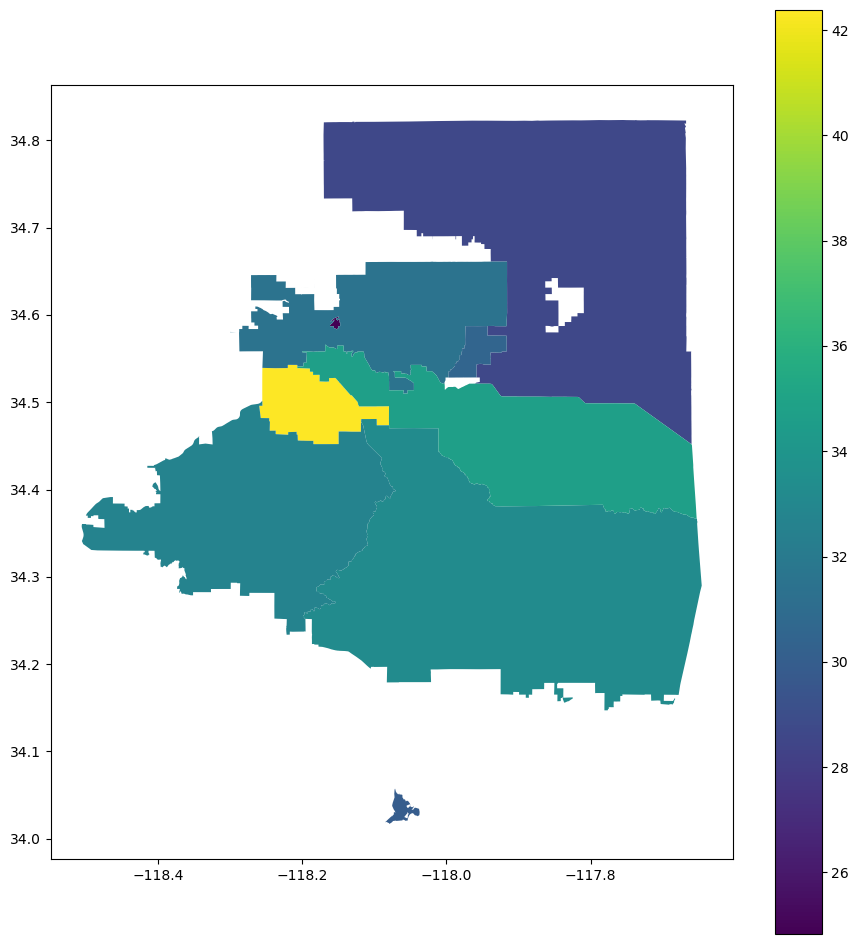

In [25]:
filtered_df.plot(figsize=(11, 12),
                 column='Commute Time Above 1 Hour',
                 legend=True)

In [26]:
#Then plot, as 10 of reference, the ones with least commute
filtered_df = merged_df[merged_df['Commute Time Above 1 Hour'] < 10]

<Axes: >

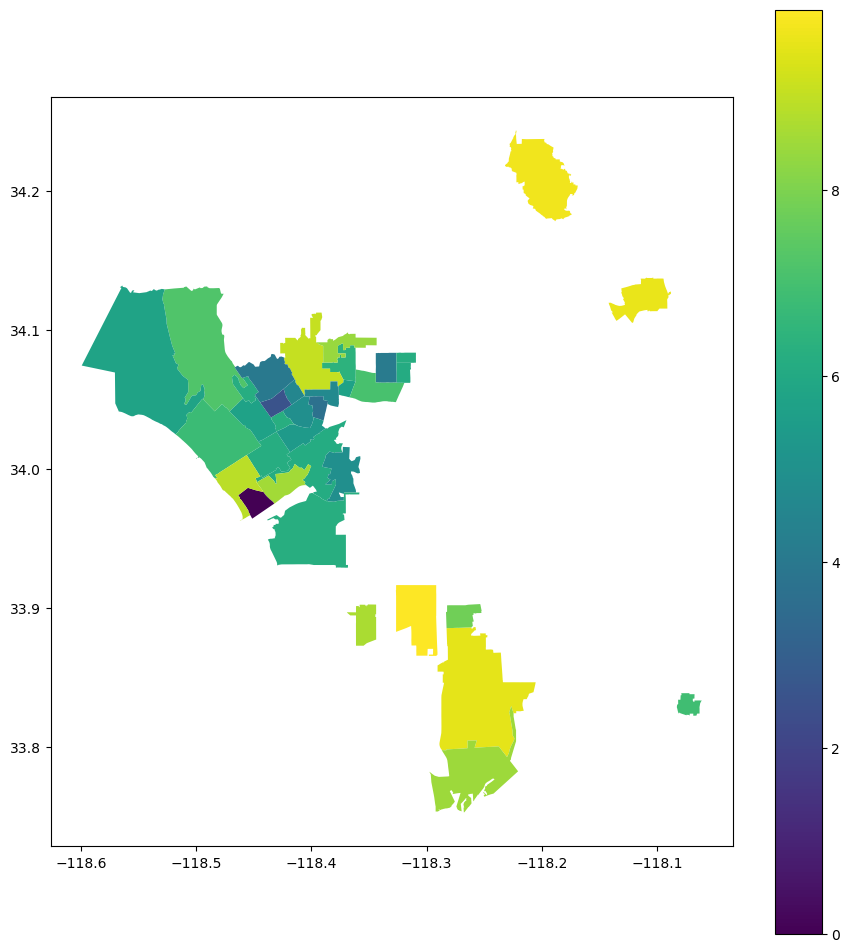

In [27]:
filtered_df.plot(figsize=(11, 12),
                 column='Commute Time Above 1 Hour',
                 legend=True)

<Axes: ylabel='Frequency'>

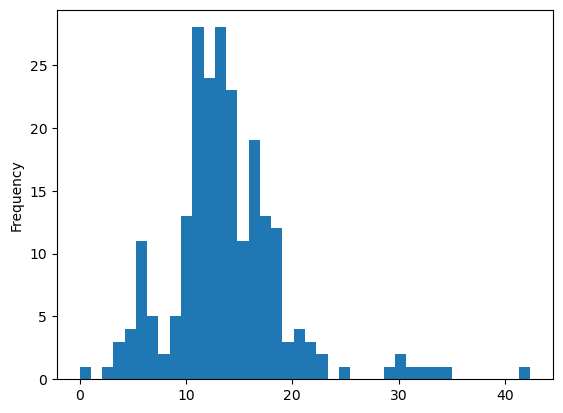

In [30]:
#Hisogram is provided to show the tendency in perncentage of worker around neighborhoods that commute more than 1 hour to work
merged_df['Commute Time Above 1 Hour'].plot.hist(bins=40)

In [33]:
#A chart that shows the neighborhoods with higher percentages
info_statistics=merged_df.sort_values(by='Commute Time Above 1 Hour',ascending = False)

In [34]:
info_statistics[['Neighborhood','Commute Time Above 1 Hour']].head(10)

,Neighborhood,Commute Time Above 1 Hour
0,Acton,42.38
174,Southeast Antelope Valley,34.66
6,Angeles Crest,33.24
192,Tujunga Canyons,32.67
134,Palmdale,31.54
184,Sun Village,30.46
220,Whittier Narrows,29.97
123,Northeast Antelope Valley,28.64
48,Desert View Highlands,24.83
31,Castaic Canyons,22.78


In [35]:
#A chart that shows the neighborhoods with the lower percentages
info_statistics=merged_df.sort_values(by='Commute Time Above 1 Hour',ascending = True)

In [36]:
info_statistics[['Neighborhood','Commute Time Above 1 Hour']].head(10)

,Neighborhood,Commute Time Above 1 Hour
111,Marina del Rey,0.00
215,West Los Angeles,2.54
21,Beverlywood,3.65
218,Westwood,4.01
73,Hancock Park,4.08
32,Century City,4.57
141,Pico-Robertson,4.66
90,Ladera Heights,4.90
36,Cheviot Hills,4.92
135,Palms,5.39
